In [1]:
from utils import *

# Time - complexity relationship

**Load and merge data.**

In [2]:
results = pd.read_csv("../data/results.csv", index_col=0)
respondents = pd.read_csv("../data/respondents.csv", index_col=0)
respondents = respondents[respondents.status=='completed']
data = results.merge(respondents[
    ['respondent', 'interval', 'time_taken', 
     'vmt_levels', 'vmt_levels_group',
     'vmt_click_speed', 'vmt_click_speed_group', 
     'vmt_press_len', 'vmt_press_len_group',
     'pst_levels', 'pst_levels_group',
     'pst_mistakes', 'pst_mistakes_group',
     'pst_press_speed', 
     'age', 'gender', 'education', 'web_browsing', 'web_skill']
], on=['respondent', 'interval'], how='outer')

C:\Users\mkrajcovic\Desktop\research-fivesecondtest\analysis\.venv\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.2, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


**Calculate groups**

In [3]:
data['task_interval'] = ''
for index, row in data.iterrows():
    data.loc[index, 'task_interval'] = str(int(np.floor((row.task - 1) / 2))) + '_' + row.interval

**Mean.**

In [4]:
data[['task', 'interval'] + list(attrak.keys())].groupby(['task', 'interval']).mean()

PQ1    PQ2    PQ3    PQ4    HQ1    HQ2    HQ3    HQ4   ATT1  \
task interval                                                                  
1    10s       5.825  5.675  5.200  5.800  5.025  4.550  4.100  4.075  5.175   
     2s        5.600  5.450  5.100  5.600  5.075  4.775  4.225  4.500  5.150   
     5s        6.000  5.700  5.375  5.825  5.150  4.700  4.275  4.375  5.350   
2    10s       5.025  5.150  4.900  5.000  4.375  4.225  4.000  3.925  4.700   
     2s        5.275  5.325  5.000  5.025  4.600  4.550  4.125  4.425  4.875   
     5s        5.275  5.325  4.800  5.175  4.875  4.575  4.350  4.475  5.175   
3    10s       5.100  5.400  4.925  5.425  5.125  5.025  4.775  4.875  5.275   
     2s        4.675  4.875  4.675  4.925  4.850  4.700  4.475  4.575  5.000   
     5s        4.775  5.225  4.775  4.950  4.600  4.700  4.425  4.700  5.125   
4    10s       4.625  5.500  5.025  4.925  4.200  3.775  3.850  4.075  4.375   
     2s        4.875  5.650  5.600  5.375  4.250  3.800  3.525  4.000  4.375   
     5s        4.725  5.400  5.425  5.125  4.300  3.900  4.025  4.125  4.250   
5    10s       4.325  4.575  4.475  4.275  3.600  3.325  3.575  4.025  3.950   
     2s        3.875  4.175  4.125  3.775  2.925  2.800  3.250  3.575  3.250   
     5s        3.975  4.425  4.275  4.000  3.600  3.300  3.825  3.925  3.775   
6    10s       2.975  3.900  4.075  3.400  3.800  3.500  2.775  2.825  3.075   
     2s        3.125  4.100  4.225  3.800  3.600  3.775  3.100  3.225  3.125   
     5s        2.950  3.825  4.375  3.600  3.725  3.650  3.125  3.125  3.000   

                ATT2       PQ       HQ     ATT  
task interval                                   
1    10s       5.175  5.62500  4.43750  5.1750  
     2s        5.425  5.43750  4.64375  5.2875  
     5s        5.225  5.72500  4.62500  5.2875  
2    10s       4.575  5.01875  4.13125  4.6375  
     2s        4.875  5.15625  4.42500  4.8750  
     5s        4.850  5.14375  4.56875  5.0125  
3    10s       5.175  5.21250  4.95000  5.2250  
     2s        4.950  4.78750  4.65000  4.9750  
     5s        5.100  4.93125  4.60625  5.1125  
4    10s       4.750  5.01875  3.97500  4.5625  
     2s        5.000  5.37500  3.89375  4.6875  
     5s        4.900  5.16875  4.08750  4.5750  
5    10s       4.050  4.41250  3.63125  4.0000  
     2s        3.700  3.98750  3.13750  3.4750  
     5s        3.925  4.16875  3.66250  3.8500  
6    10s       3.425  3.58750  3.22500  3.2500  
     2s        3.750  3.81250  3.42500  3.4375  
     5s        3.650  3.68750  3.40625  3.3250

In [5]:
data[['task', 'interval'] + list(open_text.keys())].groupby(['task', 'interval']).mean()

company  purpose  purpose_token_count  purpose_word_count  \
task interval                                                              
1    10s        1.0000   0.9750                2.325               3.375   
     2s         0.9000   1.0000                2.200               3.050   
     5s         0.9750   0.9250                2.550               3.950   
2    10s        0.9375   1.0000                3.400               4.375   
     2s         0.7875   0.6500                2.575               3.775   
     5s         0.9625   0.8250                2.575               3.825   
3    10s        0.9000   0.9500                3.225               4.175   
     2s         0.9000   0.8000                2.950               4.700   
     5s         0.8375   0.9125                2.775               3.900   
4    10s        0.9750   1.0000                2.750               3.825   
     2s         0.9625   1.0000                2.575               4.000   
     5s         1.0000   0.9750                2.550               4.225   
5    10s        0.9000   0.9500                2.325               4.325   
     2s         0.9375   0.4875                1.800               3.750   
     5s         0.9625   0.7875                2.800               5.525   
6    10s        0.9125   0.7250                2.850               5.275   
     2s         0.9000   0.6125                2.550               5.025   
     5s         0.9625   0.6375                2.700               4.375   

               detail  desc_eval_comp  desc_eval_elem  desc_eval_char  \
task interval                                                           
1    10s       0.3000           1.250           1.800           0.575   
     2s        0.1500           0.875           1.325           0.475   
     5s        0.1500           1.100           1.375           0.700   
2    10s       0.5750           1.150           1.975           0.325   
     2s        0.6000           0.725           1.350           0.425   
     5s        0.5750           0.825           1.400           0.550   
3    10s       0.3000           1.125           2.375           0.150   
     2s        0.0875           0.925           1.875           0.150   
     5s        0.1500           0.900           1.725           0.350   
4    10s       0.3750           1.175           1.950           0.225   
     2s        0.1500           0.825           1.475           0.325   
     5s        0.3375           0.975           1.550           0.500   
5    10s       0.3625           0.925           1.675           0.300   
     2s        0.1875           0.500           1.000           0.475   
     5s        0.3750           0.800           0.975           0.725   
6    10s       0.0625           0.950           1.450           0.425   
     2s        0.1125           0.750           1.125           0.650   
     5s        0.1375           0.875           1.300           0.750   

               desc_eval_sum  desc_token_count  desc_word_count  
task interval                                                    
1    10s               2.375            11.675           24.375  
     2s                1.800            10.050           20.275  
     5s                2.075            10.400           22.400  
2    10s               2.300            11.525           22.650  
     2s                1.775             8.625           20.075  
     5s                1.950            10.825           21.000  
3    10s               2.525            11.325           23.400  
     2s                2.025             9.125           20.150  
     5s                2.075            10.175           23.725  
4    10s               2.175            10.325           20.650  
     2s                1.800             9.025           19.725  
     5s                2.050             9.975           20.275  
5    10s               1.975            10.225           22.200  
     2s                1.475             6.

**Median.**

In [6]:
data[['task', 'interval'] + list(attrak.keys())].groupby(['task', 'interval']).median()

PQ1  PQ2  PQ3  PQ4  HQ1  HQ2  HQ3  HQ4  ATT1  ATT2     PQ  \
task interval                                                              
1    10s       6.0  6.0  5.0  6.0  5.0  4.0  4.0  4.0   5.0   5.0  5.750   
     2s        6.0  5.0  5.0  5.5  5.0  5.0  4.0  4.0   5.0   5.0  5.375   
     5s        6.0  6.0  5.0  6.0  5.0  5.0  4.0  4.0   5.0   5.0  5.875   
2    10s       5.0  5.0  5.0  5.0  4.0  4.0  4.0  4.0   5.0   5.0  5.000   
     2s        5.0  5.0  5.0  5.0  4.0  5.0  4.0  4.0   5.0   5.0  5.125   
     5s        5.0  5.0  5.0  5.0  5.0  5.0  4.0  5.0   5.0   5.0  5.250   
3    10s       5.0  5.5  5.0  6.0  5.0  5.0  5.0  5.0   5.0   5.0  5.250   
     2s        5.0  5.0  5.0  5.0  5.0  5.0  4.0  5.0   5.0   5.0  5.000   
     5s        5.0  5.0  5.0  5.0  5.0  5.0  4.0  5.0   5.0   5.0  5.000   
4    10s       4.5  6.0  5.0  5.0  4.0  4.0  4.0  4.0   4.0   5.0  5.000   
     2s        5.0  6.0  6.0  5.0  4.0  4.0  4.0  4.0   4.0   5.0  5.250   
     5s        5.0  6.0  5.0  5.0  4.0  4.0  4.0  4.0   4.0   5.0  5.250   
5    10s       5.0  5.0  4.5  4.0  4.0  3.0  3.0  4.0   4.0   4.0  4.625   
     2s        4.0  4.0  4.0  4.0  3.0  3.0  3.0  4.0   3.0   4.0  4.000   
     5s        4.0  4.5  4.0  3.5  3.5  3.0  4.0  4.0   4.0   4.0  3.875   
6    10s       3.0  4.0  4.0  3.0  4.0  4.0  3.0  3.0   3.0   3.0  3.750   
     2s        3.0  4.0  4.0  4.0  4.0  4.0  3.0  3.0   3.0   4.0  4.000   
     5s        2.5  4.0  4.0  3.0  4.0  4.0  3.0  3.0   3.0   4.0  3.375   

                  HQ   ATT  
task interval               
1    10s       4.250  5.00  
     2s        4.625  5.00  
     5s        4.625  5.50  
2    10s       4.125  4.75  
     2s        4.250  4.75  
     5s        4.625  5.00  
3    10s       5.000  5.25  
     2s        4.750  5.00  
     5s        4.750  5.00  
4    10s       4.000  4.50  
     2s        3.750  4.50  
     5s        4.000  4.50  
5    10s       3.750  4.00  
     2s        3.125  3.50  
     5s        3.750  3.75  
6    10s       3.250  3.00  
     2s        3.500  3.50  
     5s        3.375  3.00

In [7]:
data[['task', 'interval'] + list(open_text.keys())].groupby(['task', 'interval']).median()

company  purpose  purpose_token_count  purpose_word_count  \
task interval                                                              
1    10s           1.0     1.00                  2.0                 2.0   
     2s            1.0     1.00                  2.0                 2.0   
     5s            1.0     1.00                  2.0                 2.0   
2    10s           1.0     1.00                  3.5                 4.0   
     2s            1.0     1.00                  2.0                 3.0   
     5s            1.0     1.00                  2.0                 3.0   
3    10s           1.0     1.00                  3.0                 4.0   
     2s            1.0     1.00                  2.0                 3.0   
     5s            1.0     1.00                  2.5                 3.0   
4    10s           1.0     1.00                  2.0                 3.0   
     2s            1.0     1.00                  2.0                 3.0   
     5s            1.0     1.00                  2.0                 3.0   
5    10s           1.0     1.00                  2.0                 4.0   
     2s            1.0     0.25                  1.0                 3.0   
     5s            1.0     1.00                  2.0                 2.0   
6    10s           1.0     1.00                  2.0                 4.0   
     2s            1.0     1.00                  2.0                 3.5   
     5s            1.0     0.50                  2.0                 2.0   

               detail  desc_eval_comp  desc_eval_elem  desc_eval_char  \
task interval                                                           
1    10s          0.0             1.0             2.0             0.0   
     2s           0.0             1.0             1.0             0.0   
     5s           0.0             1.0             1.0             1.0   
2    10s          1.0             1.0             2.0             0.0   
     2s           1.0             1.0             1.0             0.0   
     5s           1.0             1.0             1.0             0.0   
3    10s          0.0             1.0             2.0             0.0   
     2s           0.0             1.0             2.0             0.0   
     5s           0.0             1.0             2.0             0.0   
4    10s          0.0             1.0             2.0             0.0   
     2s           0.0             1.0             1.0             0.0   
     5s           0.0             1.0             1.5             0.0   
5    10s          0.0             1.0             2.0             0.0   
     2s           0.0             0.0             1.0             0.0   
     5s           0.0             1.0             1.0             1.0   
6    10s          0.0             1.0             1.0             0.0   
     2s           0.0             1.0             1.0             0.0   
     5s           0.0             1.0             1.0             1.0   

               desc_eval_sum  desc_token_count  desc_word_count  
task interval                                                    
1    10s                 2.0               9.5             19.0  
     2s                  1.0               8.0             14.5  
     5s                  2.0               9.0             17.0  
2    10s                 2.5              11.5             23.0  
     2s                  2.0               7.0             16.5  
     5s                  2.0               8.0             12.5  
3    10s                 2.0              10.5             20.5  
     2s                  2.0               7.0             16.5  
     5s                  2.0               8.0             14.0  
4    10s                 2.0               8.5             18.0  
     2s                  2.0               7.5             15.0  
     5s                  2.0               8.0             14.5  
5    10s                 2.0              10.0             19.0  
     2s                  1.0               

**Std.**

In [8]:
data[['task', 'interval'] + list(attrak.keys())].groupby(['task', 'interval']).std()

PQ1       PQ2       PQ3       PQ4       HQ1       HQ2  \
task interval                                                               
1    10s       1.034966  1.047280  1.090754  1.114013  1.310461  1.501282   
     2s        1.172331  0.932325  1.057331  1.057331  1.022503  1.208676   
     5s        1.037749  0.939176  0.952392  1.034966  1.098951  0.939176   
2    10s       1.187272  1.075365  1.256777  1.484967  1.147740  1.229707   
     2s        0.905468  0.971055  1.219500  1.270726  0.981887  1.175607   
     5s        1.300641  1.227620  1.324329  1.393897  1.180775  1.375379   
3    10s       0.900142  0.955416  1.047280  0.930605  1.090460  1.025008   
     2s        1.206553  1.343312  0.944281  1.474353  1.051251  0.939176   
     5s        1.367901  1.208676  1.270726  1.449138  1.373747  1.343551   
4    10s       1.274755  1.086042  1.349026  1.268706  0.882886  0.800240   
     2s        1.453334  1.051251  1.150251  1.125178  0.980581  1.304823   
     5s        1.467380  1.335895  1.059451  1.180775  1.042679  1.194002   
5    10s       1.542351  1.483024  1.219237  1.568725  1.215287  1.163273   
     2s        1.324087  1.278771  1.399405  1.476092  1.327954  1.264911   
     5s        1.671595  1.500214  1.300641  1.853617  1.464100  1.264911   
6    10s       1.527315  1.354953  1.384669  1.706699  1.114013  1.219500   
     2s        1.453334  1.410583  1.440931  1.435806  1.081310  1.025008   
     5s        1.753385  1.722960  1.496791  1.780233  0.986771  1.166850   

                    HQ3       HQ4      ATT1      ATT2        PQ        HQ  \
task interval                                                               
1    10s       1.373747  1.384669  1.238020  1.195880  0.860456  1.274441   
     2s        1.270726  1.339728  1.231010  1.009887  0.856255  1.001421   
     5s        1.240089  1.294713  1.075365  1.073874  0.788133  0.982214   
2    10s       1.062170  0.997111  1.090754  1.217132  1.079214  0.947310   
     2s        1.264658  1.195880  1.090460  1.158857  0.899942  1.001921   
     5s        1.331088  1.339489  1.278771  1.311683  1.084399  1.202278   
3    10s       1.097491  1.042372  1.131994  0.902631  0.745822  0.907942   
     2s        1.109111  1.059451  0.987096  1.218448  1.049344  0.846940   
     5s        1.483024  1.343551  1.380960  1.127739  1.054580  1.264515   
4    10s       1.026570  1.163273  0.867874  0.869718  0.977942  0.782009   
     2s        1.219237  1.240347  1.233870  0.960769  0.945638  1.051384   
     5s        1.165476  1.223436  1.354006  1.296939  1.058221  1.010442   
5    10s       1.238020  1.165476  1.395046  1.131144  1.280462  1.066668   
     2s        1.276011  1.375379  1.497862  1.453554  1.135034  1.164306   
     5s        1.517209  1.525636  1.671595  1.558887  1.375597  1.319904   
6    10s       1.329883  1.393897  1.384669  1.174243  1.193667  1.052774   
     2s        1.236206  1.187272  1.180775  1.276011  1.192592  0.966092   
     5s        1.202295  1.066687  1.240347  1.311683  1.445317  0.890994   

                    ATT  
task interval            
1    10s       1.152200  
     2s        1.061491  
     5s        0.946569  
2    10s       1.056042  
     2s        1.048503  
     5s        1.211523  
3    10s       0.926463  
     2s        0.999679  
     5s        1.168428  
4    10s       0.752666  
     2s        1.010759  
     5s        1.211854  
5    10s       1.137924  
     2s        1.381888  
     5s        1.565657  
6    10s       1.165751  
     2s        1.150181  
     5s        1.146623

In [9]:
data[['task', 'interval'] + list(open_text.keys())].groupby(['task', 'interval']).std()

company   purpose  purpose_token_count  purpose_word_count  \
task interval                                                                
1    10s       0.000000  0.158114             1.118321            2.637865   
     2s        0.303822  0.000000             1.181047            2.218223   
     5s        0.158114  0.266747             2.024846            4.025241   
2    10s       0.231702  0.000000             1.706699            2.657235   
     2s        0.390389  0.483046             2.135025            3.990293   
     5s        0.174954  0.367772             1.517209            3.358018   
3    10s       0.281935  0.220721             1.640630            2.836461   
     2s        0.281935  0.388950             2.194983            4.647580   
     5s        0.346919  0.274738             1.671595            3.600570   
4    10s       0.158114  0.000000             1.103607            2.406055   
     2s        0.174954  0.000000             1.692934            3.623287   
     5s        0.000000  0.158114             1.767948            4.736587   
5    10s       0.281935  0.189466             1.268706            3.384637   
     2s        0.231702  0.499840             1.620383            3.814614   
     5s        0.133373  0.373609             3.337433            9.943398   
6    10s       0.250320  0.319254             1.702939            3.896004   
     2s        0.303822  0.445598             2.229752            6.423065   
     5s        0.174954  0.375320             2.162619            4.515997   

                 detail  desc_eval_comp  desc_eval_elem  desc_eval_char  \
task interval                                                             
1    10s       0.464095        1.031553        1.244475        0.712075   
     2s        0.361620        0.965760        0.858965        0.784056   
     5s        0.361620        0.871191        1.102154        0.790975   
2    10s       0.500641        0.833590        1.208676        0.525625   
     2s        0.483046        0.784056        0.948683        0.549475   
     5s        0.487668        0.902631        1.081310        0.782829   
3    10s       0.464095        0.852974        1.462129        0.426675   
     2s        0.274738        0.729858        0.991955        0.361620   
     5s        0.361620        0.900142        1.085747        0.579567   
4    10s       0.490290        0.902631        1.299901        0.479717   
     2s        0.361620        0.812956        1.061868        0.572332   
     5s        0.458362        0.999679        1.280024        0.751068   
5    10s       0.480218        0.858965        1.327954        0.516398   
     2s        0.370161        0.640513        1.176697        0.554122   
     5s        0.477037        0.790975        0.973692        0.678894   
6    10s       0.231702        0.875595        1.280024        0.675107   
     2s        0.309828        0.808608        1.066687        0.802240   
     5s        0.339447        0.882523        1.066987        0.776250   

               desc_eval_sum  desc_token_count  desc_word_count  
task interval                                                    
1    10s            1.352822          6.719232        16.594234  
     2s             1.399634          7.088995        17.089489  
     5s             1.206553          7.149682        19.320243  
2    10s            1.223698          5.296286        11.414229  
     2s             1.187272          5.400321        15.583337  
     5s             1.280024          7.775331        18.408471  
3    10s            1.467380          6.719232        14.235744  
     2s             1.120611          4.962358        13.344643  
     5s             1.308503          8.161471        22.405342  
4    10s            1.337573          6.684799        15.456390  
     2s             1.136797          6.070050        15.832436  
     5s             1.413307          7.105388        17.326410  
5    10s            1.440931  

**Plots**

C:\Users\mkrajcovic\Desktop\research-fivesecondtest\analysis\scripts\utils.py:167: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby([group]).mean().reset_index().plot(x = group, y= columns, title=title, figsize=(5, 3))
C:\Users\mkrajcovic\Desktop\research-fivesecondtest\analysis\.venv\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.2, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(
C:\Users\mkrajcovic\Desktop\research-fivesecondtest\analysis\scripts\utils.py:167: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only colum

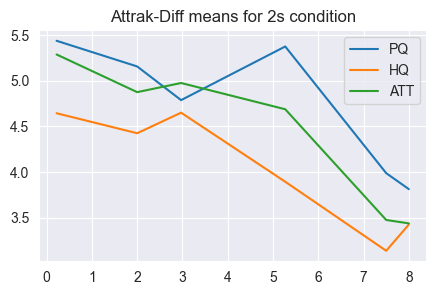

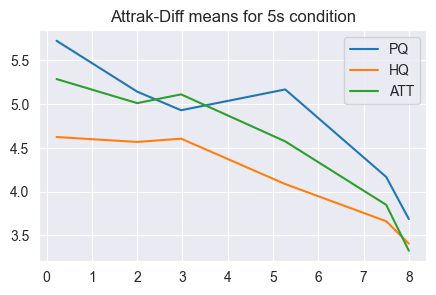

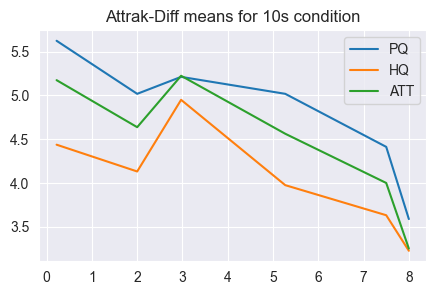

In [10]:
my_mean_plot(data[data.interval == '2s'], ['PQ', 'HQ', 'ATT'], 'complexity', 'Attrak-Diff means for 2s condition')
my_mean_plot(data[data.interval == '5s'], ['PQ', 'HQ', 'ATT'], 'complexity', 'Attrak-Diff means for 5s condition')
my_mean_plot(data[data.interval == '10s'], ['PQ', 'HQ', 'ATT'], 'complexity', 'Attrak-Diff means for 10s condition')

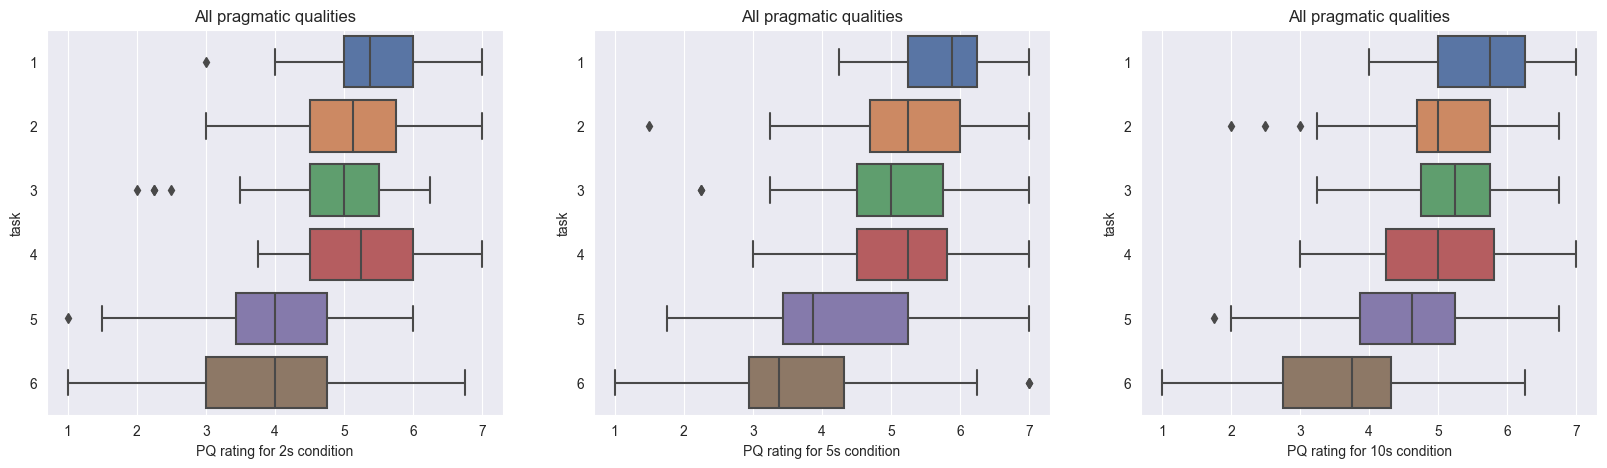

In [11]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(20, 5))
my_box_xy(data[data.interval == '2s'], 'PQ', 'task', attrak['PQ'], 'PQ rating for 2s condition', ax1)
my_box_xy(data[data.interval == '5s'], 'PQ', 'task', attrak['PQ'], 'PQ rating for 5s condition', ax2)
my_box_xy(data[data.interval == '10s'], 'PQ', 'task', attrak['PQ'], 'PQ rating for 10s condition', ax3)

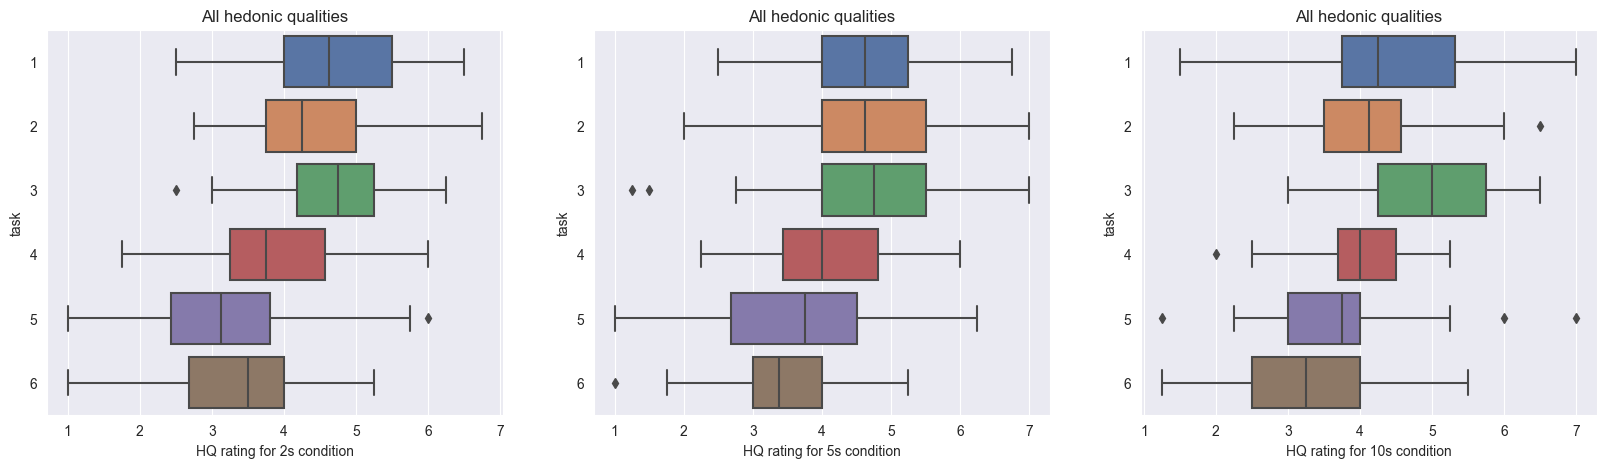

In [12]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(20, 5))
my_box_xy(data[data.interval == '2s'], 'HQ', 'task', attrak['HQ'], 'HQ rating for 2s condition', ax1)
my_box_xy(data[data.interval == '5s'], 'HQ', 'task', attrak['HQ'], 'HQ rating for 5s condition', ax2)
my_box_xy(data[data.interval == '10s'], 'HQ', 'task', attrak['HQ'], 'HQ rating for 10s condition', ax3)

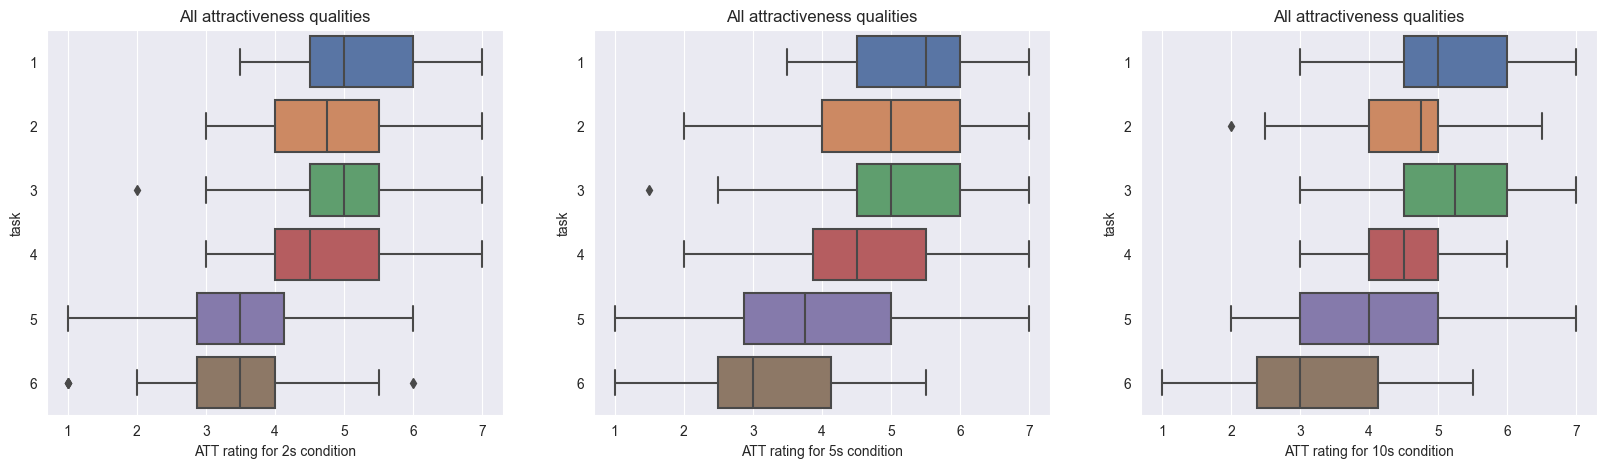

In [13]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(20, 5))
my_box_xy(data[data.interval == '2s'], 'ATT', 'task', attrak['ATT'], 'ATT rating for 2s condition', ax1)
my_box_xy(data[data.interval == '5s'], 'ATT', 'task', attrak['ATT'], 'ATT rating for 5s condition', ax2)
my_box_xy(data[data.interval == '10s'], 'ATT', 'task', attrak['ATT'], 'ATT rating for 10s condition', ax3)

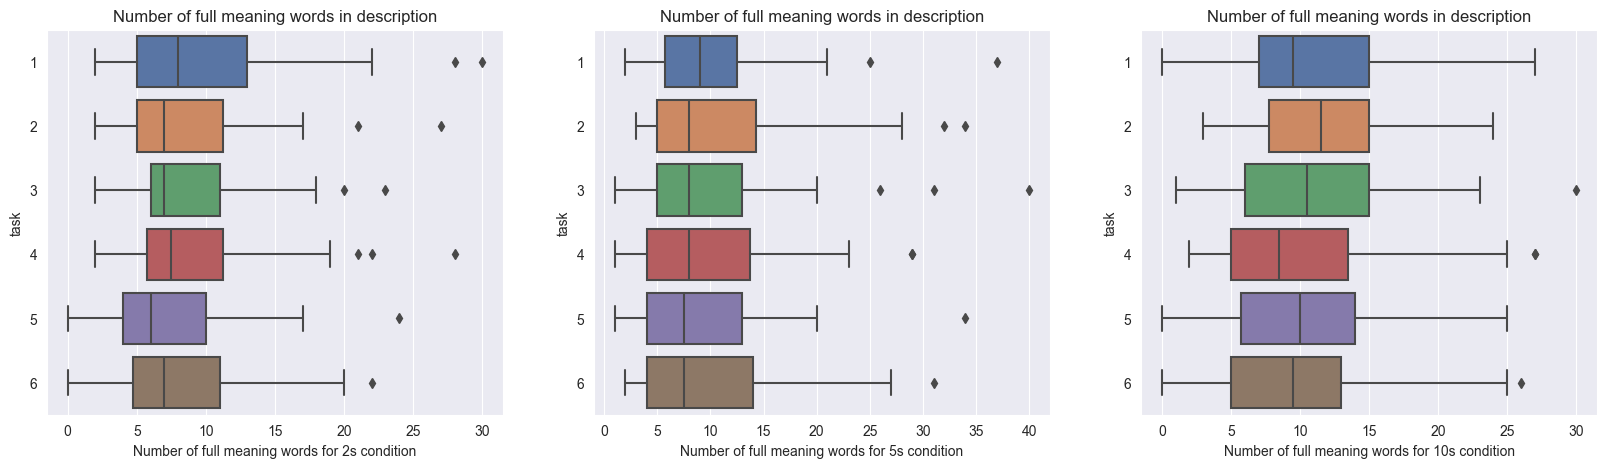

In [14]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(20, 5))
my_box_xy(data[data.interval == '2s'], 'desc_token_count', 'task', open_text['desc_token_count'], 'Number of full meaning words for 2s condition', ax1)
my_box_xy(data[data.interval == '5s'], 'desc_token_count', 'task', open_text['desc_token_count'], 'Number of full meaning words for 5s condition', ax2)
my_box_xy(data[data.interval == '10s'], 'desc_token_count', 'task', open_text['desc_token_count'], 'Number of full meaning words for 10s condition', ax3)

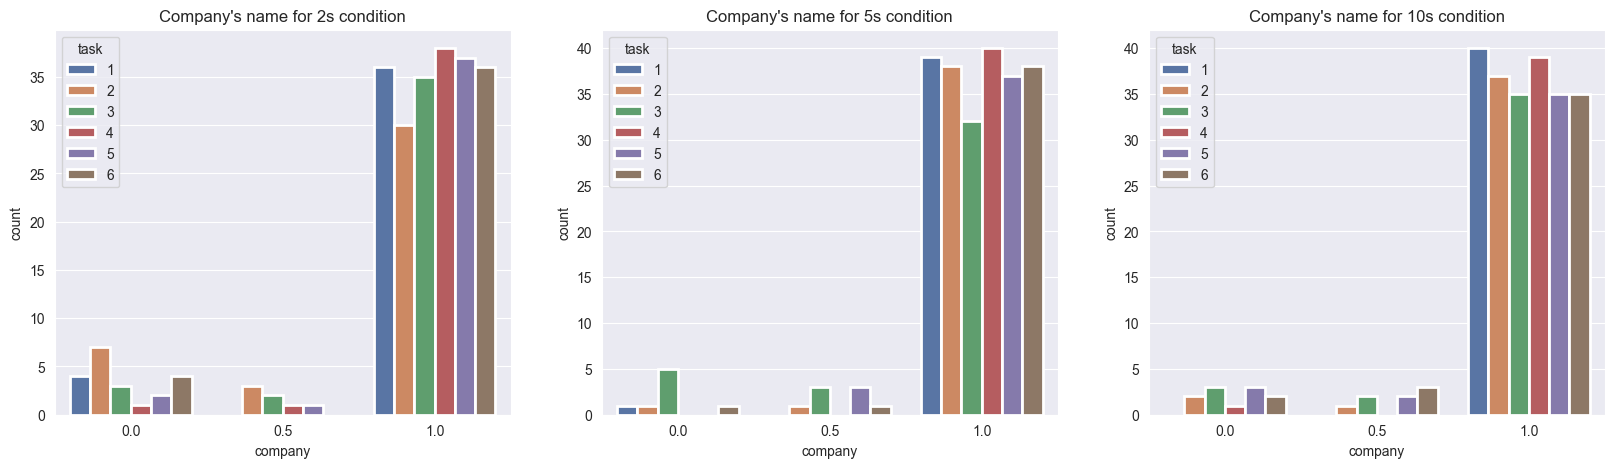

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

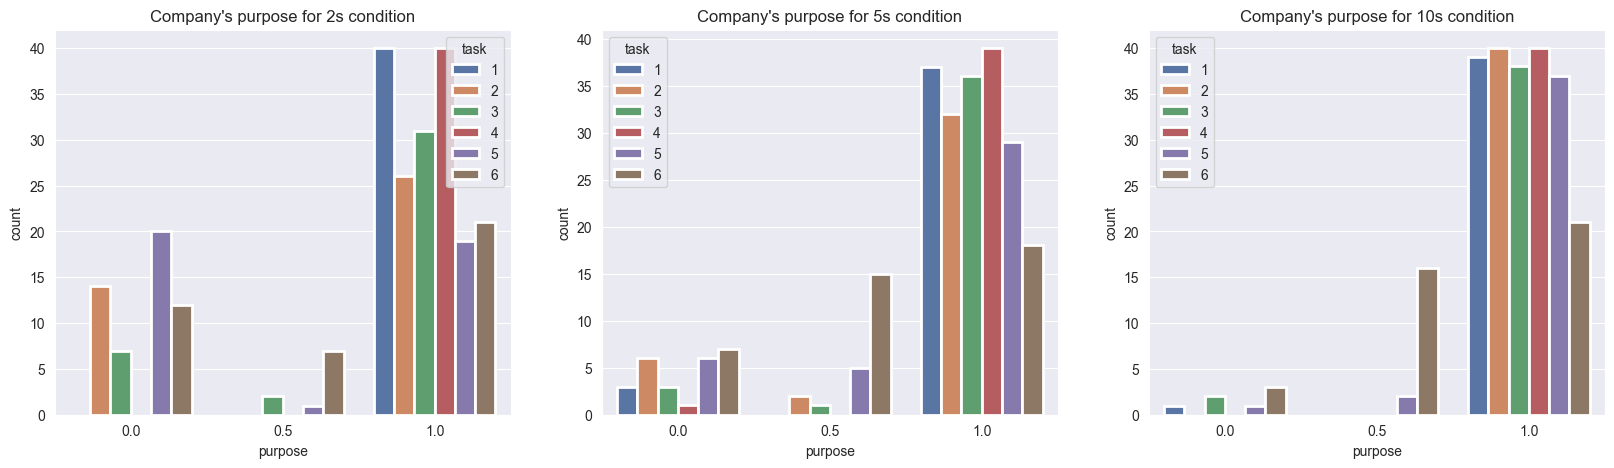

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

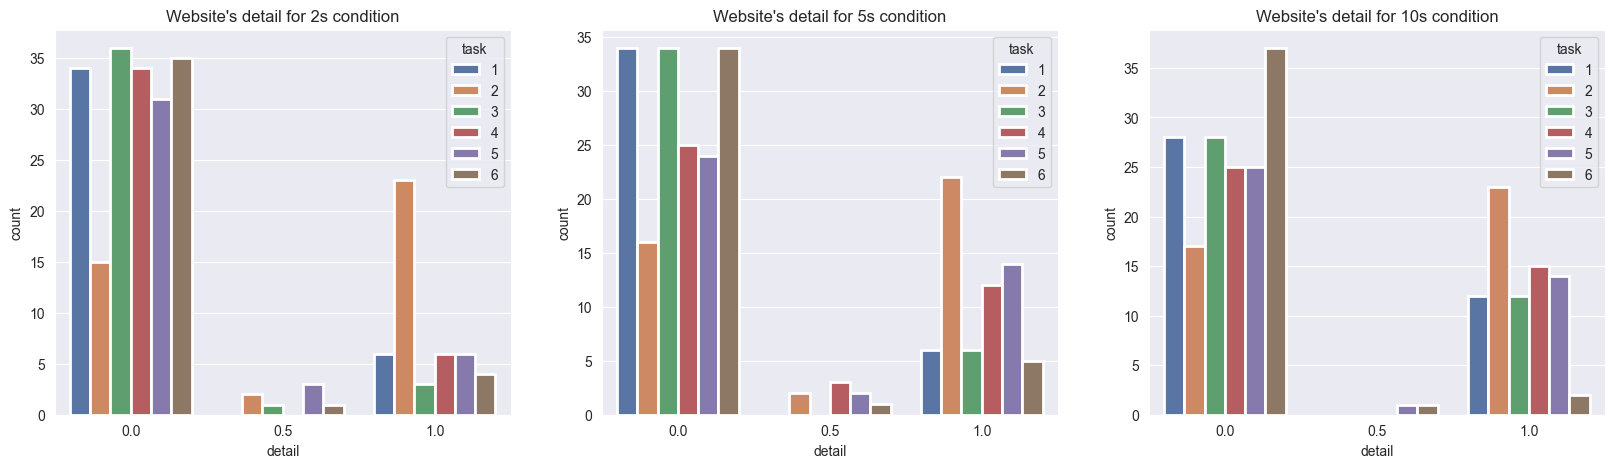

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

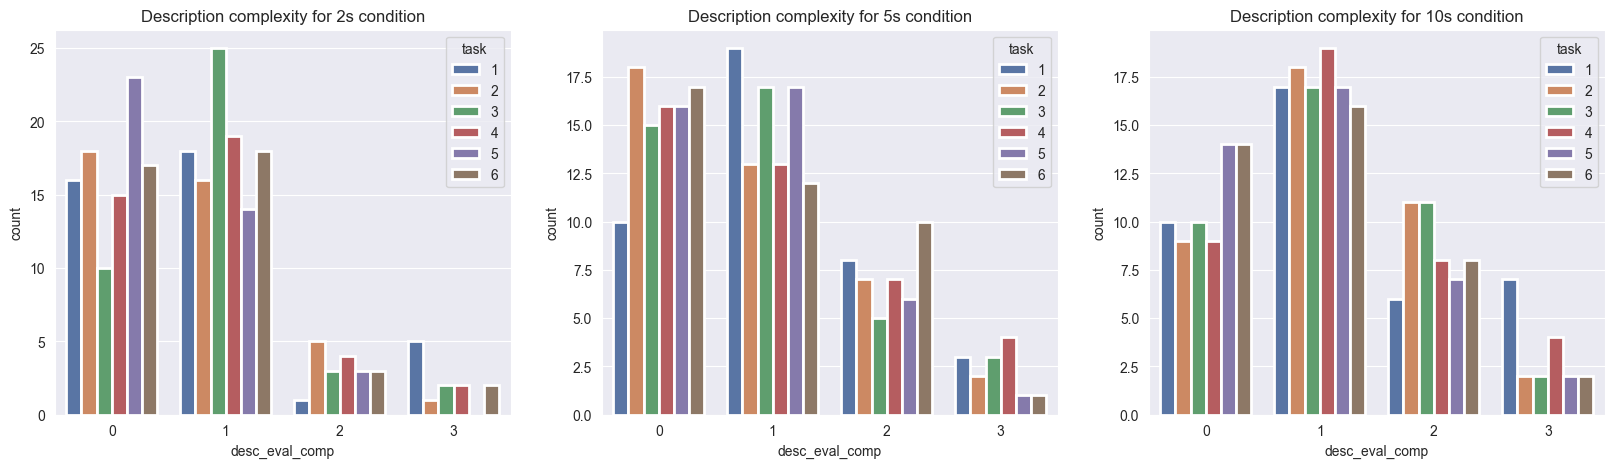

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

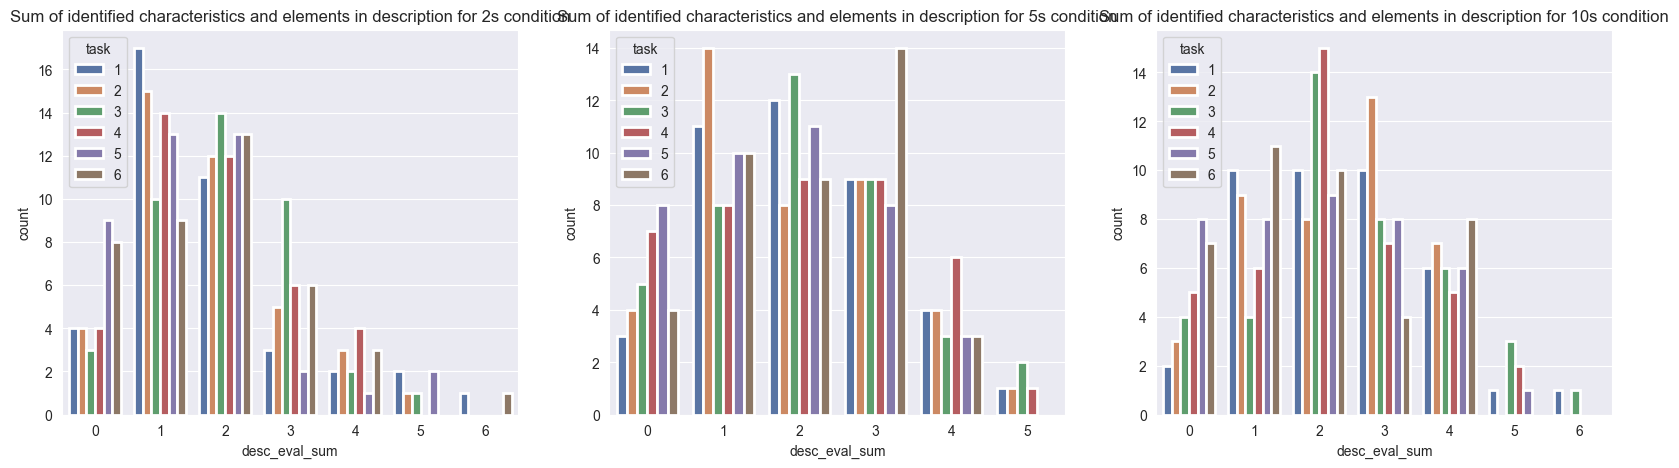

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [15]:
for col in ['company', 'purpose', 'detail', 'desc_eval_comp', 'desc_eval_sum']:
    fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(20, 5))
    my_bar_grouped(data[data.interval == '2s'], col, 'task', open_text[col] + ' for 2s condition', ax=ax1)
    my_bar_grouped(data[data.interval == '5s'], col, 'task', open_text[col] + ' for 5s condition', ax=ax2)
    my_bar_grouped(data[data.interval == '10s'], col, 'task', open_text[col] + ' for 10s condition', ax=ax3)

**Complexity and time interval - 2 sec vs. 5 sec.**

In [16]:
for column in ['PQ', 'HQ', 'ATT']:
    my_test(stats.kruskal, data[data.interval != '10s'], column, 'task_interval', column)

PQ
KruskalResult(statistic=117.87868457964774, pvalue=8.829695352049756e-24)
(80,)
(80,)
(80,)
(80,)
(80,)
(80,)
----> pvalue: 8.829695352049756e-24

Post-hoc testing:
('0_2s', '1_2s')      0.2233554774886265                   0
('0_2s', '2_2s')    1.3566878961618813e-12                   1
('0_2s', '0_5s')      0.2635286655984696                   0
('0_2s', '1_5s')     0.18617991618377697                   0
('0_2s', '2_5s')    6.333636115153371e-10                   1
('1_2s', '2_2s')    4.3749347892782627e-10                   1
('1_2s', '0_5s')     0.01921219839725095                   1
('1_2s', '1_5s')       0.865319222023579                   0
('1_2s', '2_5s')    8.581936939631335e-08                   1
('2_2s', '0_5s')    8.686468012961982e-14                   1
('2_2s', '1_5s')    3.959009733603501e-09                   1
('2_2s', '2_5s')      0.6297264094686748                   0
('0_5s', '1_5s')    0.017770109784483897                   1
('0_5s', '2_5s')    1.136628086

In [17]:
for column in ['desc_token_count']:
    my_test(stats.kruskal, data[data.interval != '10s'], column, 'task_interval', column)

desc_token_count
KruskalResult(statistic=7.2094016772101135, pvalue=0.20552684103918095)
(80,)
(80,)
(80,)
(80,)
(80,)
(80,)
 pvalue: 0.20552684103918095



**Complexity and time interval - 5 sec vs. 10 sec.**

In [18]:
for column in ['PQ', 'HQ', 'ATT']:
    my_test(stats.kruskal, data[data.interval != '2s'], column, 'task_interval', column)

PQ
KruskalResult(statistic=103.82281436270817, pvalue=8.258627813479368e-21)
(80,)
(80,)
(80,)
(80,)
(80,)
(80,)
----> pvalue: 8.258627813479368e-21

Post-hoc testing:
('0_5s', '1_5s')    0.017770109784483897                   1
('0_5s', '2_5s')    1.704942129003339e-10                   1
('0_5s', '0_10s')     0.5028408018213921                   0
('0_5s', '1_10s')   0.025468390297970465                   1
('0_5s', '2_10s')   5.899445935076588e-11                   1
('1_5s', '2_5s')    2.778515745226909e-07                   1
('1_5s', '0_10s')    0.11532588010940434                   0
('1_5s', '1_10s')     0.7946401856095633                   0
('1_5s', '2_10s')   4.131522065540807e-07                   1
('2_5s', '0_10s')   1.8078238621901665e-09                   1
('2_5s', '1_10s')   1.9150447669601385e-08                   1
('2_5s', '2_10s')     0.5587596728628667                   0
('0_10s', '1_10s')   0.12647421292807318                   0
('0_10s', '2_10s')  7.079213558

In [19]:
for column in ['desc_token_count']:
    my_test(stats.kruskal, data[data.interval != '2s'], column, 'task_interval', column)

desc_token_count
KruskalResult(statistic=9.301447927431385, pvalue=0.09762784399450714)
(80,)
(80,)
(80,)
(80,)
(80,)
(80,)
 pvalue: 0.09762784399450714



**Complexity and time interval - 2 sec vs. 10 sec.**

In [20]:
for column in ['PQ', 'HQ', 'ATT']:
    my_test(stats.kruskal, data[data.interval != '5s'], column, 'task_interval', column)

PQ
KruskalResult(statistic=115.08522027018537, pvalue=3.444935702944853e-23)
(80,)
(80,)
(80,)
(80,)
(80,)
(80,)
----> pvalue: 3.444935702944853e-23

Post-hoc testing:
('0_2s', '1_2s')      0.2427153692987799                   0
('0_2s', '2_2s')    1.6666309803108545e-12                   1
('0_2s', '0_10s')     0.7608273828064366                   0
('0_2s', '1_10s')     0.2427153692987799                   0
('0_2s', '2_10s')   4.196510437338318e-10                   1
('1_2s', '2_2s')    4.196510437338318e-10                   1
('1_2s', '0_10s')     0.1538074360914046                   0
('1_2s', '1_10s')      0.903192428850794                   0
('1_2s', '2_10s')   1.2142608313802352e-07                   1
('2_2s', '0_10s')   1.6666309803108545e-12                   1
('2_2s', '1_10s')   3.027614653724379e-10                   1
('2_2s', '2_10s')     0.7165883525252639                   0
('0_10s', '1_10s')    0.1538074360914046                   0
('0_10s', '2_10s')  4.19651043

In [21]:
for column in ['desc_token_count']:
    my_test(stats.kruskal, data[data.interval != '5s'], column, 'task_interval', column)

desc_token_count
KruskalResult(statistic=24.153559509674395, pvalue=0.00020284578535254485)
(80,)
(80,)
(80,)
(80,)
(80,)
(80,)
----> pvalue: 0.00020284578535254485

Post-hoc testing:
('0_2s', '1_2s')      0.8992116478495326                   0
('0_2s', '2_2s')     0.19697422925784258                   0
('0_2s', '0_10s')     0.0133603927961862                   1
('0_2s', '1_10s')    0.19697422925784258                   0
('0_2s', '2_10s')     0.2918215040276809                   0
('1_2s', '2_2s')     0.16111508513349473                   0
('1_2s', '0_10s')     0.0133603927961862                   1
('1_2s', '1_10s')    0.19697422925784258                   0
('1_2s', '2_10s')     0.2918215040276809                   0
('2_2s', '0_10s')   0.00010790837318256708                   1
('2_2s', '1_10s')   0.012928813873181984                   1
('2_2s', '2_10s')   0.017976861186059113                   1
('0_10s', '1_10s')    0.2918215040276809                   0
('0_10s', '2_10s')   

**Complexity and time - all groups**

In [22]:
for column in ['PQ', 'HQ', 'ATT']:
    my_test(stats.kruskal, data[(data.task_interval != '1_2s') & (data.task_interval != '1_5s') & (data.task_interval != '1_10s')], column, 'task_interval', column)

PQ
KruskalResult(statistic=141.82300311780472, pvalue=7.330251156029408e-29)
(80,)
(80,)
(80,)
(80,)
(80,)
(80,)
----> pvalue: 7.330251156029408e-29

Post-hoc testing:
('0_2s', '2_2s')    1.111087320207236e-12                   1
('0_2s', '0_5s')      0.3425872652780105                   0
('0_2s', '2_5s')    3.958522571970857e-10                   1
('0_2s', '0_10s')     0.7101055572860074                   0
('0_2s', '2_10s')   3.5970089462899865e-10                   1
('2_2s', '0_5s')    8.686468012961982e-14                   1
('2_2s', '2_5s')      0.6654034702020307                   0
('2_2s', '0_10s')   1.111087320207236e-12                   1
('2_2s', '2_10s')     0.6654034702020307                   0
('0_5s', '2_5s')    6.819768516013357e-11                   1
('0_5s', '0_10s')     0.5942664021525543                   0
('0_5s', '2_10s')   1.474861483769147e-11                   1
('2_5s', '0_10s')   8.034772720845186e-10                   1
('2_5s', '2_10s')     0.651886

In [23]:
for column in ['desc_token_count']:
    my_test(stats.kruskal, data, column, 'task_interval', column)

desc_token_count
KruskalResult(statistic=24.324715989880254, pvalue=0.002021320221303847)
(80,)
(80,)
(80,)
(80,)
(80,)
(80,)
(80,)
(80,)
(80,)
----> pvalue: 0.002021320221303847

Post-hoc testing:
('0_2s', '1_2s')       0.924903409216662                   0
('0_2s', '2_2s')     0.29546134388676387                   0
('0_2s', '0_5s')     0.44639454065032114                   0
('0_2s', '1_5s')      0.9092715364608797                   0
('0_2s', '2_5s')      0.9092715364608797                   0
('0_2s', '0_10s')    0.03206494271084688                   1
('0_2s', '1_10s')    0.29546134388676387                   0
('0_2s', '2_10s')    0.41367593002681763                   0
('1_2s', '2_2s')      0.2577841362135916                   0
('1_2s', '0_5s')      0.4969343305020296                   0
('1_2s', '1_5s')      0.9291166550849427                   0
('1_2s', '2_5s')      0.9092715364608797                   0
('1_2s', '0_10s')    0.03206494271084688                   1
('1_2s', 

**Complexity and time interval - categorical variables.**

In [24]:
my_chi(data, 'company', 'task_interval', {0: [0.5]})

task_interval  0_10s  0_2s  0_5s  1_10s  1_2s  1_5s  2_10s  2_2s  2_5s
company                                                               
0.0                3    14     3      6     7     8     10     7     5
1.0               77    66    77     74    73    72     70    73    75

pvalue: 0.058577192609121656

stat = 15.029354207436398, df = 8
expected frequencies:
[[ 7.  7.  7.  7.  7.  7.  7.  7.  7.]
 [73. 73. 73. 73. 73. 73. 73. 73. 73.]]



In [25]:
my_chi(data[(data.task_interval != '1_2s') & (data.task_interval != '1_5s') & (data.task_interval != '1_10s')], 'company', 'task_interval', {0: [0.5]})

task_interval  0_10s  0_2s  0_5s  2_10s  2_2s  2_5s
company                                            
0.0                3    14     3     10     7     5
1.0               77    66    77     70    73    75

----> pvalue: 0.011646156896916194

stat = 14.71624266144814, df = 5
expected frequencies:
[[ 7.  7.  7.  7.  7.  7.]
 [73. 73. 73. 73. 73. 73.]]

Post-hoc testing:
('0_10s', '0_2s')    0.15616170688400402                   0
('0_10s', '0_5s')                    1.0                   0
('0_10s', '2_10s')     0.269903741843515                   0
('0_10s', '2_2s')     0.4949676856886248                   0
('0_10s', '2_5s')     0.8436932974916005                   0
('0_2s', '0_5s')     0.15616170688400402                   0
('0_2s', '2_10s')     0.6159414028994668                   0
('0_2s', '2_2s')      0.3176972485303738                   0
('0_2s', '2_5s')     0.23082843164203692                   0
('0_5s', '2_10s')      0.269903741843515                   0
('0_5s', '2_2s')

**Purpose**

In [26]:
my_chi(data, 'purpose', 'task_interval', {0: [0.5]})

task_interval  0_10s  0_2s  0_5s  1_10s  1_2s  1_5s  2_10s  2_2s  2_5s
purpose                                                               
0.0              1.0  14.0  11.0    2.0   9.0   5.0   22.0  40.0  33.0
1.0             79.0  66.0  69.0   78.0  71.0  75.0   58.0  40.0  47.0

----> pvalue: 8.115996284056312e-23

stat = 122.95827021071479, df = 8
expected frequencies:
[[15.22222222 15.22222222 15.22222222 15.22222222 15.22222222 15.22222222
  15.22222222 15.22222222 15.22222222]
 [64.77777778 64.77777778 64.77777778 64.77777778 64.77777778 64.77777778
  64.77777778 64.77777778 64.77777778]]

Post-hoc testing:
('0_10s', '0_2s')   0.0016667092989865774                   1
('0_10s', '0_5s')   0.006587870723869361                   1
('0_10s', '1_10s')                   1.0                   0
('0_10s', '1_2s')    0.01604290048900327                   1
('0_10s', '1_5s')    0.08412207108168884                   0
('0_10s', '2_10s')  2.0477672480992757e-05                   1
('0_10s

In [27]:
my_chi(data[(data.task_interval != '1_2s') & (data.task_interval != '1_5s') & (data.task_interval != '1_10s')], 'purpose', 'task_interval', {0: [0.5]})

task_interval  0_10s  0_2s  0_5s  2_10s  2_2s  2_5s
purpose                                            
0.0              1.0  14.0  11.0   22.0  40.0  33.0
1.0             79.0  66.0  69.0   58.0  40.0  47.0

----> pvalue: 1.200270102409168e-13

stat = 69.67011211123643, df = 5
expected frequencies:
[[20.16666667 20.16666667 20.16666667 20.16666667 20.16666667 20.16666667]
 [59.83333333 59.83333333 59.83333333 59.83333333 59.83333333 59.83333333]]

Post-hoc testing:
('0_10s', '0_2s')   0.0014610763335271945                   1
('0_10s', '0_5s')   0.004540323598126601                   1
('0_10s', '2_10s')  1.9746327035243016e-05                   1
('0_10s', '2_2s')   8.888715356174254e-11                   1
('0_10s', '2_5s')   1.4601754728801294e-08                   1
('0_2s', '0_5s')     0.13128946739052308                   0
('0_2s', '2_10s')     0.0524145212124369                   0
('0_2s', '2_2s')    6.420473983338246e-05                   1
('0_2s', '2_5s')    0.001785835272

**Detail**

In [28]:
my_chi(data, 'detail', 'task_interval', {0: [0.5]})

task_interval  0_10s  0_2s  0_5s  1_10s  1_2s  1_5s  2_10s  2_2s  2_5s
detail                                                                
0.0             45.0  51.0  52.0   53.0  71.0  62.0   64.0  70.0  61.0
1.0             35.0  29.0  28.0   27.0   9.0  18.0   16.0  10.0  19.0

----> pvalue: 1.6588460323005633e-06

stat = 41.53010223774978, df = 8
expected frequencies:
[[58.77777778 58.77777778 58.77777778 58.77777778 58.77777778 58.77777778
  58.77777778 58.77777778 58.77777778]
 [21.22222222 21.22222222 21.22222222 21.22222222 21.22222222 21.22222222
  21.22222222 21.22222222 21.22222222]]

Post-hoc testing:
('0_10s', '0_2s')    0.19954948431264088                   0
('0_10s', '0_5s')     0.1594781237925312                   0
('0_10s', '1_10s')   0.14556607466311655                   0
('0_10s', '1_2s')   0.0003450484787051259                   1
('0_10s', '1_5s')   0.019577384953115215                   1
('0_10s', '2_10s')   0.00821093794031814                   1
('0_10s',

In [43]:
my_chi(data[(data.task_interval != '1_2s') & (data.task_interval != '1_5s') & (data.task_interval != '1_10s')], 'detail', 'task_interval', {0: [0.5]})

task_interval  0_10s  0_2s  0_5s  2_10s  2_2s  2_5s
detail                                             
0.0             45.0  51.0  52.0   64.0  70.0  61.0
1.0             35.0  29.0  28.0   16.0  10.0  19.0

----> pvalue: 5.978201447064794e-05

stat = 26.895362941839927, df = 5
expected frequencies:
[[57.16666667 57.16666667 57.16666667 57.16666667 57.16666667 57.16666667]
 [22.83333333 22.83333333 22.83333333 22.83333333 22.83333333 22.83333333]]

Post-hoc testing:
('0_10s', '0_2s')    0.18024674344157013                   0
('0_10s', '0_5s')    0.18024674344157013                   0
('0_10s', '2_10s')  0.0068903755791081015                   1
('0_10s', '2_2s')   0.0003664054911912205                   1
('0_10s', '2_5s')     0.0270516523505937                   1
('0_2s', '0_5s')                     1.0                   0
('0_2s', '2_10s')    0.06019287944348336                   0
('0_2s', '2_2s')    0.006434256403703429                   1
('0_2s', '2_5s')     0.111896004409518

In [41]:
my_chi(data, 'desc_eval_comp', 'task_interval', {2: [3]})

task_interval   0_10s  0_2s  0_5s  1_10s  1_2s  1_5s  2_10s  2_2s  2_5s
desc_eval_comp                                                         
0                  19    34    28     19    25    31     28    40    33
1                  35    34    32     36    44    30     33    32    29
2                  26    12    20     25    11    19     19     8    18

----> pvalue: 0.003765710270679773

stat = 35.1708956844785, df = 16
expected frequencies:
[[28.55555556 28.55555556 28.55555556 28.55555556 28.55555556 28.55555556
  28.55555556 28.55555556 28.55555556]
 [33.88888889 33.88888889 33.88888889 33.88888889 33.88888889 33.88888889
  33.88888889 33.88888889 33.88888889]
 [17.55555556 17.55555556 17.55555556 17.55555556 17.55555556 17.55555556
  17.55555556 17.55555556 17.55555556]]

Post-hoc testing:
('0_10s', '0_2s')    0.10310258007607645                   0
('0_10s', '0_5s')     0.2669264822505608                   0
('0_10s', '1_10s')                   1.0                   0
('0_10

In [40]:
my_chi(data[(data.task_interval != '1_2s') & (data.task_interval != '1_5s') & (data.task_interval != '1_10s')], 'desc_eval_comp', 'task_interval', {2: [3]})

task_interval   0_10s  0_2s  0_5s  2_10s  2_2s  2_5s
desc_eval_comp                                      
0                  19    34    28     28    40    33
1                  35    34    32     33    32    29
2                  26    12    20     19     8    18

----> pvalue: 0.023192122958986577

stat = 20.712215939400405, df = 10
expected frequencies:
[[30.33333333 30.33333333 30.33333333 30.33333333 30.33333333 30.33333333]
 [32.5        32.5        32.5        32.5        32.5        32.5       ]
 [17.16666667 17.16666667 17.16666667 17.16666667 17.16666667 17.16666667]]

Post-hoc testing:
('0_10s', '0_2s')    0.06368100534110605                   0
('0_10s', '0_5s')    0.40153594889897765                   0
('0_10s', '2_10s')   0.40153594889897765                   0
('0_10s', '2_2s')   0.0028486271414793654                   1
('0_10s', '2_5s')     0.1290332925267757                   0
('0_2s', '0_5s')     0.40153594889897765                   0
('0_2s', '2_10s')    0.401535

In [32]:
my_chi(data, 'desc_eval_elem', 'task_interval', {1: [2], 3: [4, 5]})

task_interval   0_10s  0_2s  0_5s  1_10s  1_2s  1_5s  2_10s  2_2s  2_5s
desc_eval_elem                                                         
0                11.0  13.0  13.0   11.0   9.0  16.0   21.0  31.0  25.0
1                42.0  59.0  54.0   37.0  56.0  45.0   41.0  41.0  45.0
3                27.0   8.0  13.0   32.0  15.0  19.0   18.0   8.0  10.0

----> pvalue: 8.212024107376395e-09

stat = 70.48285714285716, df = 16
expected frequencies:
[[16.66666667 16.66666667 16.66666667 16.66666667 16.66666667 16.66666667
  16.66666667 16.66666667 16.66666667]
 [46.66666667 46.66666667 46.66666667 46.66666667 46.66666667 46.66666667
  46.66666667 46.66666667 46.66666667]
 [16.66666667 16.66666667 16.66666667 16.66666667 16.66666667 16.66666667
  16.66666667 16.66666667 16.66666667]]

Post-hoc testing:
('0_10s', '0_2s')   0.0065005619767746995                   1
('0_10s', '0_5s')    0.04330200211488586                   1
('0_10s', '1_10s')   0.17531130792303465                   0
('0

In [33]:
my_chi(data, 'desc_eval_char', 'task_interval', {1: [2, 3]})

task_interval   0_10s  0_2s  0_5s  1_10s  1_2s  1_5s  2_10s  2_2s  2_5s
desc_eval_char                                                         
0                50.0  51.0  43.0   67.0  63.0  53.0   55.0  44.0  33.0
1                30.0  29.0  37.0   13.0  17.0  27.0   25.0  36.0  47.0

----> pvalue: 1.986505642649591e-07

stat = 46.409736308316425, df = 8
expected frequencies:
[[51. 51. 51. 51. 51. 51. 51. 51. 51.]
 [29. 29. 29. 29. 29. 29. 29. 29. 29.]]

Post-hoc testing:
('0_10s', '0_2s')                    1.0                   0
('0_10s', '0_5s')    0.21230544487024464                   0
('0_10s', '1_10s')  0.013518065030317423                   1
('0_10s', '1_2s')    0.06359440601427234                   0
('0_10s', '1_5s')     0.4476698573157634                   0
('0_10s', '2_10s')   0.28204225555266477                   0
('0_10s', '2_2s')     0.2346739640047764                   0
('0_10s', '2_5s')   0.023926360388070333                   1
('0_2s', '0_5s')     0.169483966

In [35]:
my_chi(data, 'desc_eval_sum', 'task_interval', {1: [2], 3: [4, 5, 6]})

task_interval  0_10s  0_2s  0_5s  1_10s  1_2s  1_5s  2_10s  2_2s  2_5s
desc_eval_sum                                                         
0                5.0   8.0   7.0    9.0   7.0  12.0   15.0  17.0  12.0
1               37.0  55.0  45.0   39.0  50.0  38.0   38.0  48.0  40.0
3               38.0  17.0  28.0   32.0  23.0  30.0   27.0  15.0  28.0

----> pvalue: 0.002894096891158389

stat = 35.99931705123521, df = 16
expected frequencies:
[[10.22222222 10.22222222 10.22222222 10.22222222 10.22222222 10.22222222
  10.22222222 10.22222222 10.22222222]
 [43.33333333 43.33333333 43.33333333 43.33333333 43.33333333 43.33333333
  43.33333333 43.33333333 43.33333333]
 [26.44444444 26.44444444 26.44444444 26.44444444 26.44444444 26.44444444
  26.44444444 26.44444444 26.44444444]]

Post-hoc testing:
('0_10s', '0_2s')     0.0387081934071142                   1
('0_10s', '0_5s')    0.19893457949915735                   0
('0_10s', '1_10s')    0.2849220866731494                   0
('0_10s', 

In [4]:
my_chi(data[(data.task_interval != '1_2s') & (data.task_interval != '1_5s') & (data.task_interval != '1_10s')], 'desc_eval_sum', 'task_interval', {1: [2], 3: [4, 5, 6]})

task_interval  0_10s  0_2s  0_5s  2_10s  2_2s  2_5s
desc_eval_sum                                      
0                5.0   8.0   7.0   15.0  17.0  12.0
1               37.0  55.0  45.0   38.0  48.0  40.0
3               38.0  17.0  28.0   27.0  15.0  28.0

----> pvalue: 0.0008773969063284687

stat = 29.93641429956013, df = 10
expected frequencies:
[[10.66666667 10.66666667 10.66666667 10.66666667 10.66666667 10.66666667]
 [43.83333333 43.83333333 43.83333333 43.83333333 43.83333333 43.83333333]
 [25.5        25.5        25.5        25.5        25.5        25.5       ]]

Post-hoc testing:
('0_10s', '0_2s')    0.01548327736284568                   1
('0_10s', '0_5s')    0.10447459803632007                   0
('0_10s', '2_10s')   0.07326042588103963                   0
('0_10s', '2_2s')   0.0018981391249943272                   1
('0_10s', '2_5s')    0.10447459803632007                   0
('0_2s', '0_5s')     0.10447459803632007                   0
('0_2s', '2_10s')    0.07326042588

In [8]:
my_chi(data[(data.task_interval != '1_2s') & (data.task_interval != '1_5s') & (data.task_interval != '1_10s')], 'desc_eval_sum', 'task_interval', {4: [5, 6]})

task_interval  0_10s  0_2s  0_5s  2_10s  2_2s  2_5s
desc_eval_sum                                      
0                5.0   8.0   7.0   15.0  17.0  12.0
1               19.0  32.0  25.0   19.0  22.0  20.0
2               18.0  23.0  20.0   19.0  26.0  20.0
3               23.0   8.0  18.0   12.0   8.0  22.0
4               15.0   9.0  10.0   15.0   7.0   6.0

----> pvalue: 0.004126337988966514

stat = 40.6532172893428, df = 20
expected frequencies:
[[10.66666667 10.66666667 10.66666667 10.66666667 10.66666667 10.66666667]
 [22.83333333 22.83333333 22.83333333 22.83333333 22.83333333 22.83333333]
 [21.         21.         21.         21.         21.         21.        ]
 [15.16666667 15.16666667 15.16666667 15.16666667 15.16666667 15.16666667]
 [10.33333333 10.33333333 10.33333333 10.33333333 10.33333333 10.33333333]]

Post-hoc testing:
('0_10s', '0_2s')    0.06775459598119453                   0
('0_10s', '0_5s')    0.17932629511176468                   0
('0_10s', '2_10s')   0.1793

In [33]:
my_chi(data, 'desc_word_count_group', 'task_interval')

task_interval          0_10s  0_2s  0_5s  1_10s  1_2s  1_5s  2_10s  2_2s  2_5s
desc_word_count_group                                                         
high                      35    22    26     30    22    29     30    16    29
low                       15    32    30     22    27    32     18    33    29
med                       30    26    24     28    31    19     32    31    22

----> pvalue: 0.02366947534724453

stat = 29.03974830285438, df = 16
expected frequencies:
[[26.55555556 26.55555556 26.55555556 26.55555556 26.55555556 26.55555556
  26.55555556 26.55555556 26.55555556]
 [26.44444444 26.44444444 26.44444444 26.44444444 26.44444444 26.44444444
  26.44444444 26.44444444 26.44444444]
 [27.         27.         27.         27.         27.         27.
  27.         27.         27.        ]]

Post-hoc testing:
('0_10s', '0_2s')    0.16066375298079516                   0
('0_10s', '0_5s')    0.17516306429137862                   0
('0_10s', '1_10s')   0.43225823247209105

In [34]:
my_chi(data, 'desc_token_count_group', 'task_interval')

task_interval           0_10s  0_2s  0_5s  1_10s  1_2s  1_5s  2_10s  2_2s  \
desc_token_count_group                                                      
high                       36    20    23     27    15    22     25    12   
low                        12    26    23     19    17    31     21    31   
med                        32    34    34     34    48    27     34    37   

task_interval           2_5s  
desc_token_count_group        
high                      27  
low                       30  
med                       23  

----> pvalue: 0.00018825598654755068

stat = 44.13331283438904, df = 16
expected frequencies:
[[23.         23.         23.         23.         23.         23.
  23.         23.         23.        ]
 [23.33333333 23.33333333 23.33333333 23.33333333 23.33333333 23.33333333
  23.33333333 23.33333333 23.33333333]
 [33.66666667 33.66666667 33.66666667 33.66666667 33.66666667 33.66666667
  33.66666667 33.66666667 33.66666667]]

Post-hoc testing:
('0_10s', '0_

In [40]:
my_chi(data[(data.task_interval != '1_2s') & (data.task_interval != '1_5s') & (data.task_interval != '1_10s')], 'desc_token_count_group', 'task_interval')

task_interval           0_10s  0_2s  0_5s  2_10s  2_2s  2_5s
desc_token_count_group                                      
high                       36    20    23     25    12    27
low                        12    26    23     21    31    30
med                        32    34    34     34    37    23

----> pvalue: 0.0025784081486842914

stat = 27.027467377982838, df = 10
expected frequencies:
[[23.83333333 23.83333333 23.83333333 23.83333333 23.83333333 23.83333333]
 [23.83333333 23.83333333 23.83333333 23.83333333 23.83333333 23.83333333]
 [32.33333333 32.33333333 32.33333333 32.33333333 32.33333333 32.33333333]]

Post-hoc testing:
('0_10s', '0_2s')     0.0374361028828335                   1
('0_10s', '0_5s')    0.08349267451076066                   0
('0_10s', '2_10s')   0.13047485646952156                   0
('0_10s', '2_2s')   0.00046626680077483556                   1
('0_10s', '2_5s')     0.0374361028828335                   1
('0_2s', '0_5s')      0.6579622065470577        